In [1]:
from keras import layers

Using TensorFlow backend.


In [2]:
#Create a densely connected layer to process the input 
#which is a 2D tensor with 1 dimension being 784. The batch dimension
#is left unspecified and hence can take any value
#The layer has 32 nodes
layers = layers.Dense(32, input_shape=(784,))

#### Train a model to classify movie reviews 

In [3]:
from keras.datasets import imdb

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [7]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
train_labels[0]

1

In [9]:
max([max(tr_data) for tr_data in train_data])

9999

In [10]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 1us/step


In [15]:
count = 0
for k,v in word_index.items():
    count += 1
    print(k, v)
    if count >= 20:
        break

fawn 34701
tsukino 52006
nunnery 52007
sonja 16816
vani 63951
woods 1408
spiders 16115
hanging 2345
woody 2289
trawling 52008
hold's 52009
comically 11307
localized 40830
disobeying 30568
'royale 52010
harpo's 40831
canet 52011
aileen 19313
acurately 52012
diplomat's 52013


In [14]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

In [16]:
count = 0
for k,v in reverse_word_index.items():
    count += 1
    print(k, v)
    if count >= 20:
        break

34701 fawn
52006 tsukino
52007 nunnery
16816 sonja
63951 vani
1408 woods
16115 spiders
2345 hanging
2289 woody
52008 trawling
52009 hold's
11307 comically
40830 localized
30568 disobeying
52010 'royale
40831 harpo's
52011 canet
19313 aileen
52012 acurately
52013 diplomat's


In [17]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') 
                          for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Encoding the integer sequences into a binary matrix


In [18]:
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [21]:
x_train.shape

(25000, 10000)

In [25]:
x_train[0].shape

(10000,)

In [28]:
x_train[0][:20]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [31]:
sorted(train_data[0])[:50]

[1,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 7,
 7,
 8,
 8,
 8,
 9,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 14]

In [23]:
for i, sequence in enumerate(train_data):
    print(i, sequence)

0 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1 [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 501

833 [1, 2, 5, 488, 26, 6, 1021, 378, 15, 26, 4192, 23, 257, 85, 2, 47, 6, 196, 58, 1461, 11, 4, 1550, 5, 488, 6236, 6, 4057, 15, 152, 4787, 90, 4, 107, 2, 19, 68, 9382, 21, 1921, 8, 3807, 8, 257, 85, 11, 4, 130, 10, 10, 225, 24, 6, 226, 176, 8, 14, 843, 346, 4, 458, 9, 730, 930, 5, 905, 63, 9, 52, 4, 116, 9, 4829, 21, 4, 65, 889, 6, 117, 227, 8, 30, 4630, 138, 618, 81, 75, 459, 44, 134, 107, 84, 45, 6, 117, 254, 8, 67, 89, 14, 65, 3775, 46, 39, 101, 85, 9382, 65, 549, 15, 45, 76, 53, 2, 180, 5, 152, 1787, 18, 1217, 11, 12, 6, 2, 653, 7, 1062, 48, 233, 10, 10, 13, 92, 124, 45, 614, 13, 92, 3807, 8, 134, 537, 88, 207, 115, 2574, 98, 21, 13, 28, 1925, 15, 4, 2, 11, 134, 2, 26, 3475, 4, 172, 13, 963, 6, 378, 662, 295, 137, 6739, 744, 3154, 34, 4470, 8, 30, 9532, 11, 8260, 525, 4, 327, 183, 44, 346, 108, 9, 15, 36, 1754, 6, 227, 53, 673, 18, 269, 142, 275, 5, 474, 40, 8, 67, 6, 275, 193, 10, 10, 2]
834 [1, 11, 192, 45, 691, 4, 172, 20, 5, 36, 426, 60, 79, 4, 58, 347, 7, 687, 2296, 279, 15, 

1583 [1, 6, 87, 1577, 8, 6283, 1594, 10, 10, 1691, 4712, 9, 6, 20, 25, 92, 67, 175, 251, 12, 47, 321, 156, 8, 140, 19, 6, 321, 65, 14, 9, 24, 6, 1280, 217, 18, 1478, 4956, 21, 29, 1777, 4, 217, 40, 29, 1777, 308, 2, 10, 10, 4, 3313, 1098, 316, 23, 703, 5, 889, 6, 171, 3139, 4358, 65, 9, 24, 6, 162, 31, 21, 4, 65, 304, 6, 1476, 162, 458, 23, 12, 10, 10, 6, 132, 1478, 9, 1412, 145, 11, 58, 8, 79, 1618, 23, 6, 3313, 63, 47, 6877, 46, 91, 7, 132, 243, 10, 10, 4, 156, 11, 14, 71, 1190, 13, 215, 202, 6, 760, 8, 2782, 2743, 37, 16, 642, 17, 4, 1752, 3127, 592, 3636, 1478, 892, 11, 6, 1752, 1550, 10, 10, 4, 167, 122, 35, 480, 292, 23, 2341, 178, 6, 1193, 431, 7, 6, 705, 2, 34, 6, 132, 93, 3313, 10, 10, 4, 1389, 110, 11, 4, 3313, 182, 93, 12, 235, 40, 36, 521, 4, 182, 54, 1714, 26, 2168, 83, 2862, 2, 10, 10, 14, 20, 16, 321, 5, 215, 67, 5, 82, 94, 6, 215, 205, 10, 10, 13, 55, 76, 545, 386, 12, 10, 10, 158, 158]
1584 [1, 207, 258, 4, 20, 2403, 18, 1531, 63, 416, 1843, 11, 4, 5900, 18, 298, 84, 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [1, 14, 16, 6, 55, 52, 22, 13, 161, 140, 83, 12, 19, 55, 312, 1398, 5, 16, 3595, 770, 34, 4, 116, 4, 229, 5, 4, 1385, 6689, 4798, 16, 777, 5, 38, 16, 1820, 2, 36, 3846, 4, 123, 21, 4, 85, 156, 256, 68, 531, 1669, 82, 55, 737, 22]
12081 [1, 13, 427, 784, 14, 7984, 51, 243, 7, 84, 870, 5, 106, 14, 1244, 608, 61, 1246, 5, 7000, 119, 12, 4002, 21, 13, 97, 252, 146, 73, 46, 7, 4, 673, 159, 12, 266, 23, 94, 38, 2279, 5, 4734, 21, 4, 249, 155, 44, 12, 9, 4, 116, 13, 2488, 759, 32, 1255, 2, 141, 17, 14, 88, 4, 5928, 26, 38, 1639, 5, 9000, 51, 575, 8, 1255, 2, 19, 147, 736, 13, 384, 37, 494, 8, 124, 51, 575, 8, 2615, 105, 75, 124, 164, 44, 15, 1131, 120, 891, 153, 596, 13, 657, 4, 2986, 62, 276, 53, 212, 23, 2, 2, 150, 19, 4, 2, 7, 2, 1769, 50, 9, 53, 673, 18, 595, 40, 14]
12082 [1, 6, 1710, 8, 25, 24, 8, 30, 2, 34, 4, 1433, 2, 5, 767, 2, 9, 1149, 5, 2, 5, 93, 72, 104, 400, 7, 6, 5263, 34, 2, 44, 4864, 32, 4, 105, 62, 30, 7494, 295, 54, 294, 961, 56, 4, 2385, 7, 249, 108, 126, 93, 45, 24, 4, 1

12830 [1, 14, 9, 6, 1677, 9831, 698, 212, 20, 5, 31, 15, 13, 100, 106, 120, 5, 120, 174, 209, 1790, 1458, 826, 5300, 47, 115, 2566, 11, 6, 78, 217, 5, 14, 9, 57, 1401, 572, 19, 27, 2245, 2210, 21, 55, 1096, 1300, 1347, 5250, 8378, 47, 210, 77, 35, 8005, 7, 1923, 237, 29, 2684, 11, 2, 7, 2614, 2, 13, 264, 15, 4151, 1259, 9, 4, 147, 323, 7, 14, 22, 151, 3256, 8, 30, 38, 2797, 33, 285, 59, 497, 8, 81, 21, 11, 882, 9, 38, 6699, 23, 572, 33, 4, 130, 54, 59, 8305, 316, 15, 59, 47, 7490, 38, 76, 278, 15, 59, 47, 1957, 1864, 2, 27, 1649, 31, 155, 127, 4404, 72, 151, 100, 294, 591, 376, 72, 138, 13, 566, 4438, 14, 23, 345, 288, 42, 1856, 2718, 11, 4, 2285, 100, 294, 591, 9575]
12831 [1, 6, 1767, 9849, 39, 4, 633, 6027, 2796, 6912, 558, 579, 72, 99, 3891, 525, 368, 1884, 312, 497, 38, 254, 8, 30, 163, 5, 996, 3605, 60, 19, 542, 505, 34, 1659, 2, 5, 3776, 4599, 1611, 7367, 272, 2942, 469, 27, 239, 5, 492, 1867, 331, 272, 2, 14, 166, 1629, 3926, 168, 40, 6, 212, 356]
12832 [1, 45, 24, 6, 530, 326,

13714 [1, 4, 2744, 6722, 1655, 2744, 2312, 4768, 11, 27, 118, 217, 126, 4, 2, 2545, 554, 23, 4, 3918, 961, 27, 2682, 18, 27, 2043, 8, 6, 491, 17, 29, 82, 4846, 8, 130, 4, 2, 2484, 2081, 2, 8, 97, 1165, 2, 40, 309, 10, 10, 13, 16, 38, 2, 18, 14, 31, 15, 13, 296, 45, 8406, 4077, 5, 639, 2043, 16, 17, 530, 17, 13, 2283, 5, 9293, 1287, 4, 815, 21, 131, 737, 4304, 11, 4, 3629, 18, 4, 4343, 114, 5, 1212, 39, 6, 519, 1313, 63, 14, 598, 1313, 714, 6014, 3382, 1892, 11, 206, 5, 836, 10, 10, 2, 430, 127, 6722, 28, 836, 60, 54, 25, 124, 2744, 80, 1090, 4, 5963, 5, 430, 81, 134, 108, 7603, 4, 568, 17, 2797, 45, 131, 530, 149, 90, 81, 12, 45, 330, 2, 8, 104, 15, 107, 493, 19, 2, 5, 2, 70, 987, 2, 53, 836, 74, 233, 148, 9817, 1431, 1463, 3948, 122, 11, 9379, 10, 10, 2, 12, 56, 8, 723, 2, 37, 47, 14, 2, 405, 7, 1205, 2, 6, 1080, 664, 60, 151, 240, 1423, 105, 15, 26, 230, 39, 1981, 11, 1370, 40, 3732, 2, 121, 57, 31, 746, 158, 2064, 62, 30, 1668, 19, 6, 5802, 29, 468, 8, 1632, 8, 61, 998, 5266, 19, 92

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [37]:
#Convert the integer labels into floating point type
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [38]:
y_train[:10]

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)

In [39]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [40]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [43]:
#We can configure the optimizer
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [44]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [45]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512, 
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.5125 - accuracy: 0.7959 - val_loss: 0.4114 - val_accuracy: 0.8423
Epoch 2/20
15000/15000 [==============================] - 1s 60us/step - loss: 0.3108 - accuracy: 0.9019 - val_loss: 0.3110 - val_accuracy: 0.8856
Epoch 3/20
15000/15000 [==============================] - 1s 59us/step - loss: 0.2268 - accuracy: 0.9286 - val_loss: 0.2834 - val_accuracy: 0.8880
Epoch 4/20
15000/15000 [==============================] - 1s 59us/step - loss: 0.1785 - accuracy: 0.9424 - val_loss: 0.2886 - val_accuracy: 0.8823
Epoch 5/20
15000/15000 [==============================] - 1s 59us/step - loss: 0.1475 - accuracy: 0.9542 - val_loss: 0.2765 - val_accuracy: 0.8904
Epoch 6/20
15000/15000 [==============================] - 1s 59us/step - loss: 0.1205 - accuracy: 0.9633 - val_loss: 0.2901 - val_accuracy: 0.8877
Epoch 7/20
15000/15000 [==============================] - 1s 58us/s

In [46]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [47]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [48]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
epochs = range(1, len(accuracy) + 1)

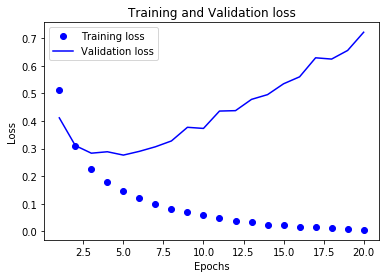

In [49]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

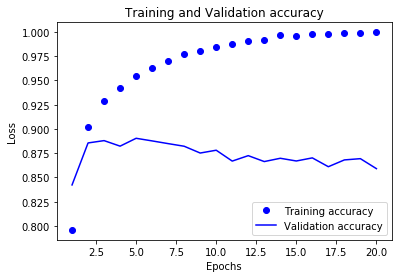

In [50]:
accuracy_values = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [61]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(64,)))
model.add(layers.Dense(16, activation='relu', input_shape=(64,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/10
25000/25000 [==============================] - 1s 60us/step - loss: 0.4231 - accuracy: 0.8090
Epoch 2/10
25000/25000 [==============================] - 1s 54us/step - loss: 0.2341 - accuracy: 0.9101
Epoch 3/10
25000/25000 [==============================] - 1s 54us/step - loss: 0.1834 - accuracy: 0.9312
Epoch 4/10
25000/25000 [==============================] - 1s 53us/step - loss: 0.1495 - accuracy: 0.9444
Epoch 5/10
25000/25000 [==============================] - 1s 54us/step - loss: 0.1244 - accuracy: 0.9548
Epoch 6/10
25000/25000 [==============================] - 1s 54us/step - loss: 0.1085 - accuracy: 0.9598
Epoch 7/10
25000/25000 [==============================] - 1s 54us/step - loss: 0.0873 - accuracy: 0.9682
Epoch 8/10
25000/25000 [==============================] - 1s 54us/step - loss: 0.0718 - accuracy: 0.9726
Epoch 9/10
25000/25000 [==============================] - 1s 54us/step - loss: 0.0593 - accuracy: 0.9781
Epoch 10/10
25000/25000 [==============================

In [60]:
results

[0.11152396486155688, 0.8631200194358826]

In [53]:
model.predict(x_test)

array([[0.15693697],
       [0.99995214],
       [0.7818353 ],
       ...,
       [0.08806905],
       [0.05561164],
       [0.5278937 ]], dtype=float32)